In [1]:
import pandas
import duckdb

In [2]:
import json

# 1. Open and load the JSON file
with open('config.json', 'r') as f:
    config_data = json.load(f)

# 2. Print it nicely
print("--- CONFIGURATION FILE CONTENT ---")
print(json.dumps(config_data, indent=4))

# 3. Example: Access a specific value
# If your config looks like {"database": {"host": "localhost"}}, you can do:
# print(config_data['database']['host'])

--- CONFIGURATION FILE CONTENT ---
{
    "Channels": {
        "Ambient Temperature": {
            "Frequency": 1,
            "Name": "Ambient Temperature"
        },
        "Brake Pos": {
            "Frequency": 50,
            "Name": "Brake Pos"
        },
        "Brake Pos Unfiltered": {
            "Frequency": 50,
            "Name": "Brake Pos Unfiltered"
        },
        "Brake Tickness": {
            "Frequency": 10,
            "Name": "Brake Tickness"
        },
        "Brakes Force": {
            "Frequency": 50,
            "Name": "Brakes Force"
        },
        "Brakes Temp": {
            "Frequency": 50,
            "Name": "Brakes Temp"
        },
        "Clutch Pos": {
            "Frequency": 50,
            "Name": "Clutch Pos"
        },
        "Clutch Pos Unfiltered": {
            "Frequency": 50,
            "Name": "Clutch Pos Unfiltered"
        },
        "Clutch RPM": {
            "Frequency": 100,
            "Name": "Clutch RPM"
        },


In [3]:

# 1. Connect to your file
con = duckdb.connect('my_data.duckdb')

# 2. List all tables
print("\n--- TABLES IN DATABASE ---")
tables = con.execute("SHOW TABLES").df()
print(tables.to_string(index=True))




--- TABLES IN DATABASE ---
                          name
0                          ABS
1                     ABSLevel
2          Ambient Temperature
3          AntiStall Activated
4                 Best LapTime
5                 Best Sector1
6                 Best Sector2
7              Brake Bias Rear
8              Brake Migration
9                    Brake Pos
10        Brake Pos Unfiltered
11                Brakes Force
12                 Brakes Temp
13               CloudDarkness
14                  Clutch Pos
15       Clutch Pos Unfiltered
16                  Clutch RPM
17             Current LapTime
18              Current Sector
19             Current Sector1
20             Current Sector2
21                        Drag
22              Engine Max RPM
23             Engine Oil Temp
24                  Engine RPM
25           Engine Water Temp
26                  FFB Output
27               Finish Status
28          Front3rdDeflection
29              FrontDownForce
30         

In [175]:
import duckdb

# Connect to your database
con = duckdb.connect('my_data.duckdb')

# Query the "Lap" table to find where value becomes 1

query = """
SELECT * FROM "Lap Time" 
LIMIT 100
"""

# Execute and display
df = con.execute(query).df()
print(df)

# Close connection
con.close()

          ts  value
0    79.2175    0.0
1    99.2025    0.0
2   119.2050    0.0
3   139.2050    0.0
4   159.2050    0.0
5   179.2050    0.0
6   199.2050    0.0
7   219.2075    0.0
8   239.2050    0.0
9   259.2050    0.0
10  279.2150    0.0
11  299.2050    0.0
12  319.2050    0.0
13  339.2075    0.0
14  359.2050    0.0
15  379.2050    0.0
16  399.2050    0.0
17  419.2050    0.0
18  439.2050    0.0
19  459.2050    0.0
20  479.2025    0.0
21  499.2025    0.0
22  519.2050    0.0
23  539.2050    0.0
24  559.2025    0.0
25  579.2050    0.0


In [56]:
# 2. Loop through tables with proper quoting
for table_name in tables['name']:
    print(f"\n--- PREVIEW: {table_name} ---")
    
    # FIX: Add double quotes around {table_name} to handle spaces
    # We use single quotes '...' for the f-string so we can use double quotes "..." inside
    print("Schema:")
    schema_df = con.execute(f'DESCRIBE "{table_name}"').df()
    print(schema_df)
    
    print("Data Sample:")
    data_df = con.execute(f'SELECT * FROM "{table_name}" LIMIT 10').df()
    print(data_df)


--- PREVIEW: ABS ---
Schema:
  column_name column_type null   key default extra
0          ts      DOUBLE  YES  None    None  None
1       value     BOOLEAN  YES  None    None  None
Data Sample:
       ts  value
0  79.205  False
1  99.195  False
2  99.195   True
3  99.195  False
4  99.195   True
5  99.195  False
6  99.195   True
7  99.195  False
8  99.195   True
9  99.195  False

--- PREVIEW: ABSLevel ---
Schema:
  column_name column_type null   key default extra
0          ts      DOUBLE  YES  None    None  None
1       value    UTINYINT  YES  None    None  None
Data Sample:
         ts  value
0   79.2050      9
1   99.1975      9
2  119.1975      9
3  139.1975      9
4  159.1975      9
5  179.1975      9
6  199.1975      9
7  219.1975      9
8  239.1975      9
9  259.1975      9

--- PREVIEW: Ambient Temperature ---
Schema:
  column_name column_type null   key default extra
0       value       FLOAT  YES  None    None  None
Data Sample:
       value
0  22.001593
1  22.001637
2  22.0

In [ ]:
table_name = ""
data_df = con.execute(f'SELECT * FROM "{table_name}" LIMIT 10').df()

Index(['Time', 'Ambient Temperature', 'Brake Pos', 'Brake Pos Unfiltered',
       'Clutch Pos', 'Clutch Pos Unfiltered', 'Clutch RPM', 'Drag',
       'Engine Oil Temp', 'Engine RPM', 'Engine Water Temp', 'FFB Output',
       'Front3rdDeflection', 'FrontDownForce', 'FrontRideHeight',
       'FrontWingHeight', 'Fuel Level', 'G Force Lat', 'G Force Long',
       'G Force Vert', 'GPS Latitude', 'GPS Longitude', 'GPS Speed',
       'GPS Time', 'Ground Speed', 'Lap Dist', 'Lateral Acceleration',
       'Longitudinal Acceleration', 'OverheatingState', 'Path Lateral',
       'ReadDownForce', 'Rear3rdDeflection', 'RearRideHeight', 'Regen Rate',
       'SoC', 'Steered Angle', 'Steering Pos', 'Steering Pos Unfiltered',
       'Steering Shaft Torque', 'Throttle Pos', 'Throttle Pos Unfiltered',
       'Time Behind Next', 'Total Dist', 'Track Edge', 'Track Temperature',
       'Turbo Boost Pressure', 'Virtual Energy', 'Wind Heading', 'Wind Speed',
       'Yaw Rate'],
      dtype='object')

In [12]:
master_df["Lap Dist"]

0           0.001000
1           0.001000
2           0.001000
3           0.001000
4           0.001000
            ...     
54066    5672.200195
54067    5672.200195
54068    5672.200195
54069    5672.200195
54070    5672.200195
Name: Lap Dist, Length: 54071, dtype: float32

In [147]:
import duckdb
import pandas as pd
from functools import reduce

def get_channel_clean(lap, channels, con, config, buffer_seconds=1.0, verbose=True):
    """
    Extracts telemetry for a specific lap using the 'Lap' event table for precise timing.
    """
    
    # --- Helper 1: Get Precise Lap Boundaries from Event Table ---
    def _get_lap_bounds(target_lap):
        if verbose: print(f"Finding boundaries for Lap {target_lap} using 'Lap' event...")
        
        # We query the 'Lap' table which records lap changes (events)
        # We find the MIN(ts) for the current lap (Start) and MIN(ts) for the next lap (End)
        query = f"""
        SELECT 
            MIN(ts) as start_time,
            (SELECT MIN(ts) FROM "Lap" WHERE value = {target_lap} + 1) as end_time
        FROM "Lap"
        WHERE value = {target_lap}
        """
        df = con.execute(query).df()
        
        if df['start_time'].isnull().all():
            # Fallback: Check if lap exists at all
            max_lap = con.execute('SELECT MAX(value) FROM "Lap"').fetchone()[0]
            raise ValueError(f"Lap {target_lap} not found. Max lap is {max_lap}")
            
        start = df['start_time'].iloc[0]
        end = df['end_time'].iloc[0]
        
        # If 'end' is None, it means we are in the last lap (incomplete or just finished)
        # We use the max timestamp of the entire session as the end
        if pd.isna(end):
            if verbose: print("Lap has no end event (Last Lap). Using session end time.")
            end = con.execute('SELECT MAX(value) FROM "GPS Time"').fetchone()[0]
            
        return start, end

    # --- Helper 2: Fetch Data for specific time window ---
    def _fetch_channel(channel, t_start, t_end):
        meta = config['Channels'].get(channel)
        if not meta: return None 
        
        # Fetch data with buffer
        query = f"""
        WITH raw AS (
            SELECT 
                ROUND((row_number() OVER () - 1) / {meta['Frequency']}::FLOAT, 3) as Time,
                value as "{channel}"
            FROM "{channel}"
        )
        SELECT * FROM raw 
        WHERE Time BETWEEN {t_start - buffer_seconds} AND {t_end + buffer_seconds}
        """
        try:
            return con.execute(query).df()
        except Exception:
            return None

    # --- Main Execution ---
    
    # 1. Get Event-Based Time Boundaries
    try:
        start_time, end_time = _get_lap_bounds(lap)
    except Exception as e:
        print(f"Error calculating lap bounds: {e}")
        return None

    # 2. Fetch Channels
    # We still need Lap Dist for the X-axis
    required_channels = list(set(["Lap Dist"] + channels))
    data_frames = []
    
    if verbose: print(f"Fetching data for time range: {start_time:.3f}s - {end_time:.3f}s")

    for ch in required_channels:
        df = _fetch_channel(ch, start_time, end_time)
        if df is not None and not df.empty:
            data_frames.append(df)

    # 3. Merge
    if not data_frames: return None
    master_df = reduce(lambda l, r: pd.merge(l, r, on='Time', how='outer'), data_frames)
    master_df = master_df.sort_values('Time').ffill().bfill()
    
    # 4. Strict Clip & Relative Time
    master_df = master_df[
        (master_df['Time'] >= start_time) & 
        (master_df['Time'] <= end_time)
    ].reset_index(drop=True)
    
    # Calculate relative time precisely from the event timestamp
    master_df['relative_time'] = master_df['Time'] - start_time
    master_df = master_df.rename(columns={'Time': 'timestep'})
    
    # 5. Fix Lap Distance Offset (Optional but recommended)
    # If the first point is at 3.9m, we can choose to shift it or leave it.
    # Leaving it is usually safer for analysis, but just know that relative_time=0 is the line crossing.
    
    cols = ['timestep', 'relative_time', 'Lap Dist'] + [c for c in channels if c in master_df.columns]
    
    return {
        'data': master_df[cols],
        'meta': {
            'lap': lap,
            'time_range': (start_time, end_time),
            'lap_time': end_time - start_time,
            'rows': len(master_df)
        }
    }

Finding boundaries for Lap 0 using 'Lap' event...
Fetching data for time range: 79.215s - 219.205s
Finding boundaries for Lap 1 using 'Lap' event...
Fetching data for time range: 219.205s - 349.197s


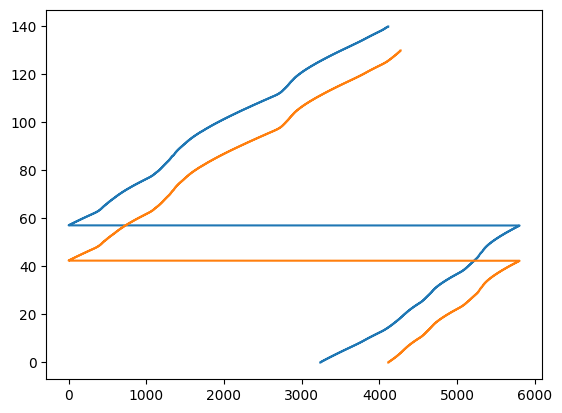

In [148]:
con = duckdb.connect('my_data.duckdb')
results1 = get_channel_clean(lap=0, channels=["Engine RPM", "GPS Speed", "Throttle Pos"], config=config, con=con)
results2 = get_channel_clean(lap=1, channels=["Engine RPM", "GPS Speed", "Throttle Pos"], config=config, con=con)


data1 = results1['data']
data2 = results2['data']
plt.plot(data1["Lap Dist"], data1["relative_time"])
plt.plot(data2["Lap Dist"], data2["relative_time"])

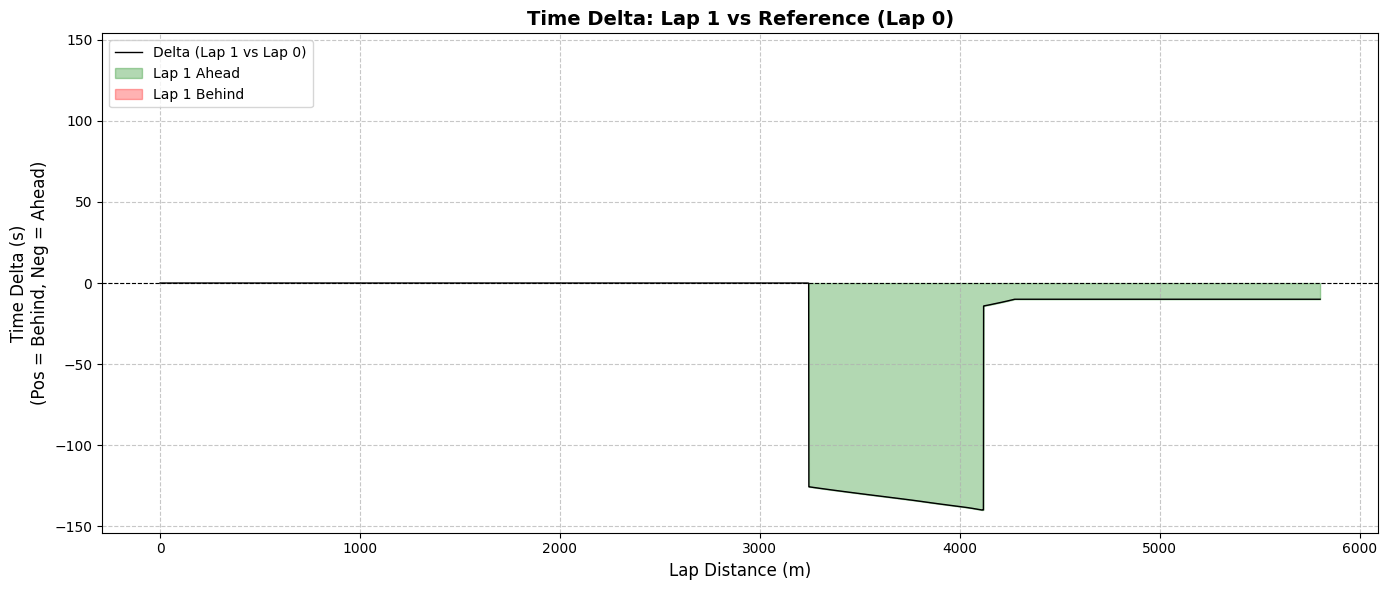

In [128]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Create a common distance grid (e.g., every 1 meter)
# We use the shorter lap's distance to avoid extrapolation errors at the end
max_dist = min(data1['Lap Dist'].max(), data2['Lap Dist'].max())
common_dist = np.arange(0, max_dist, 1.0)  # 1-meter resolution

# 2. Interpolate relative_time onto this common grid
# np.interp(x_new, x_original, y_original)
time_lap0 = np.interp(common_dist, data1['Lap Dist'], data1['relative_time'])
time_lap1 = np.interp(common_dist, data2['Lap Dist'], data2['relative_time'])

# 3. Calculate Delta (Lap 1 - Lap 0)
# Positive = Lap 1 is SLOWER (behind Lap 0)
# Negative = Lap 1 is FASTER (ahead of Lap 0)
delta = time_lap1 - time_lap0

# 4. Plotting
fig, ax = plt.subplots(figsize=(14, 6))

# Main Delta Line
ax.plot(common_dist, delta, color='black', linewidth=1, label='Delta (Lap 1 vs Lap 0)')

# Fill areas to make gain/loss obvious
# Green = Gaining time (Delta goes down/negative)
# Red = Losing time (Delta goes up/positive)
# Note: This logic assumes "Gaining" means catching up (delta getting smaller). 
# Often simplest to color: Below 0 = Ahead (Green), Above 0 = Behind (Red)
ax.fill_between(common_dist, 0, delta, where=(delta < 0), color='green', alpha=0.3, label='Lap 1 Ahead')
ax.fill_between(common_dist, 0, delta, where=(delta > 0), color='red', alpha=0.3, label='Lap 1 Behind')

# Formatting
ax.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Zero line
ax.set_title(f'Time Delta: Lap 1 vs Reference (Lap 0)', fontsize=14, fontweight='bold')
ax.set_ylabel('Time Delta (s)\n(Pos = Behind, Neg = Ahead)', fontsize=12)
ax.set_xlabel('Lap Distance (m)', fontsize=12)
ax.grid(True, which='major', linestyle='--', alpha=0.7)
ax.legend(loc='upper left')

# Auto-scale Y axis to fit data tightly but symmetrically if possible
y_abs_max = max(abs(np.min(delta)), abs(np.max(delta))) * 1.1
ax.set_ylim(-y_abs_max, y_abs_max)

plt.tight_layout()
plt.show()

In [62]:
results2["data"]["relative_time"]

0          0.000000
1          0.009995
2          0.020004
3          0.029999
4          0.039993
            ...    
12516    125.159988
12517    125.169998
12518    125.180008
12519    125.189987
12520    125.199997
Name: relative_time, Length: 12521, dtype: float32

NameError: name 'results3' is not defined

In [151]:
results = get_channel_clean(lap=2, channels=["Engine RPM", "GPS Speed", "Throttle Pos"], config=config, con=con)
results["data"].head(20)

Finding boundaries for Lap 2 using 'Lap' event...
Fetching data for time range: 349.197s - 469.197s


,timestep,relative_time,Lap Dist,Engine RPM,GPS Speed,Throttle Pos
0,349.200012,0.002502,4276.563477,7836.600098,34.398891,0.0
1,349.209991,0.012482,4276.563477,7827.890137,34.398891,0.0
2,349.220001,0.022491,4276.563477,7831.779297,34.398891,0.0
3,349.230011,0.032501,4276.563477,7829.698242,34.398891,0.0
4,349.239990,0.042480,4276.563477,7822.232910,34.398891,0.0
5,349.250000,0.052490,4276.563477,7824.025391,34.398891,0.0
6,349.260010,0.062500,4276.563477,7815.547363,34.398891,0.0
7,349.269989,0.072479,4276.563477,7804.931641,34.398891,0.0
8,349.279999,0.082489,4276.563477,7801.824707,34.398891,0.0
9,349.290009,0.092499,4276.563477,7799.873047,34.398891,0.0


In [164]:
import duckdb

# Connect to your database
con = duckdb.connect('my_data.duckdb')

# Query the "Lap" table to find where value becomes 1
print("--- Searching for Start of Lap 1 ---")
query = """
SELECT * FROM "Lap" 
ORDER BY ts ASC
LIMIT 30
"""

# Execute and display
df = con.execute(query).df()
print(df)

# Close connection
con.close()

--- Searching for Start of Lap 1 ---
          ts  value
0    79.2150      0
1    99.2025      0
2   119.2050      0
3   139.2050      0
4   159.2050      0
5   179.2025      0
6   199.2050      0
7   219.2050      0
8   219.2050      1
9   239.2050      0
10  239.2050      1
11  259.2050      0
12  259.2050      1
13  279.2150      0
14  279.2150      1
15  299.2025      0
16  299.2025      1
17  319.2050      0
18  319.2050      1
19  339.2050      0
20  339.2050      1
21  349.1975      2
22  359.2050      0
23  359.2050      1
24  369.1975      2
25  379.2050      0
26  379.2050      1
27  389.1975      2
28  399.2050      0
29  399.2050      1
